# **Part 1: Using wget**

In [ ]:
# download the data from a URL
# source: https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2025-05-20 15:57:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘arrhythmia.data’

arrhythmia.data         [   <=>              ] 392.92K   518KB/s    in 0.8s    

2025-05-20 15:57:36 (518 KB/s) - ‘arrhythmia.data’ saved [402355]



In [ ]:
# list files in current directory
!ls

arrhythmia.data  sample_data


In [ ]:
# check if the data has a header
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [ ]:
import pandas as pd
df = pd.read_csv('arrhythmia.data', header=None)

In [ ]:
# since the data has many columns, take just the first few and name them
data = df[[0, 1, 2, 3, 4, 5]]
data.columns = ['age', 'sex', 'height', 'weight', 'QRS duration', 'P-R interval']

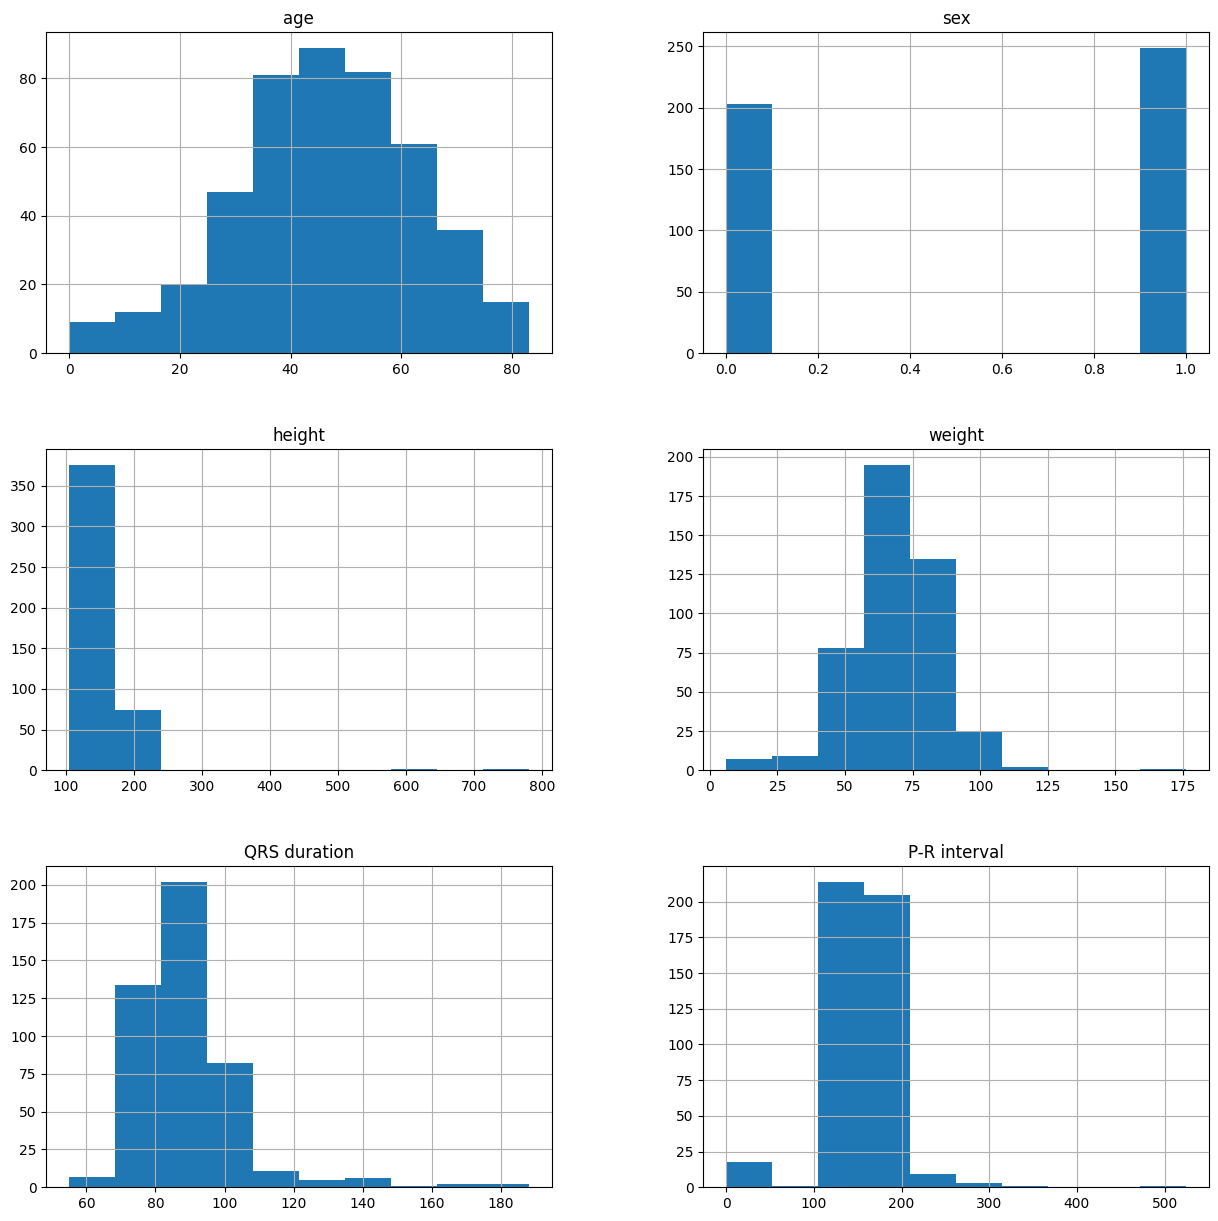

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
data.hist();

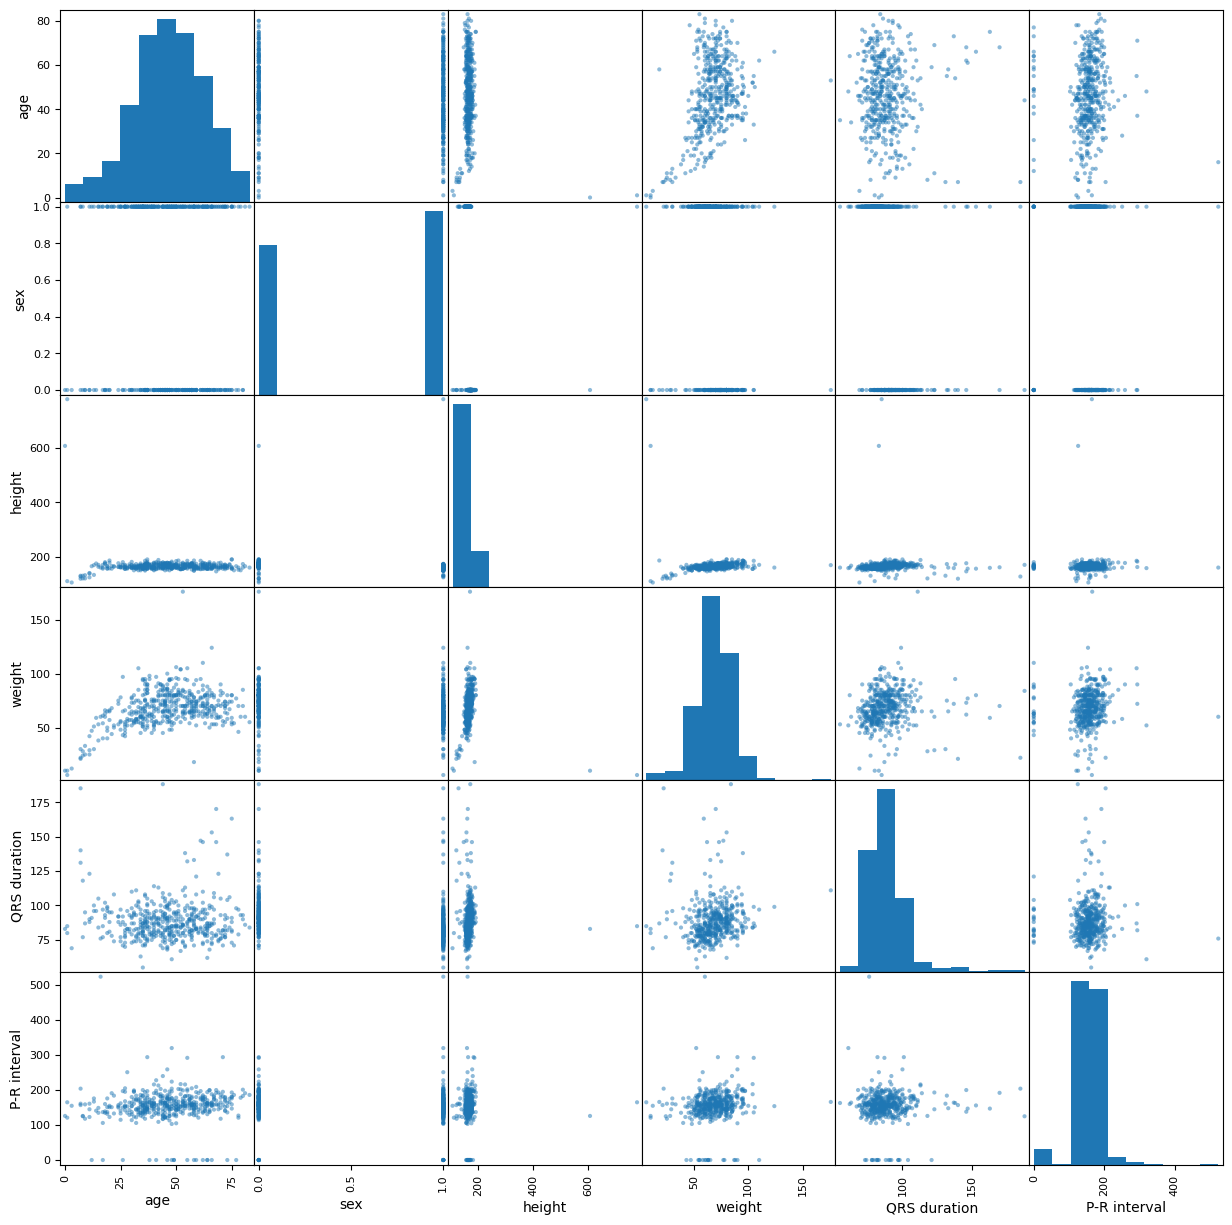

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);

# **Part 2: Using tf.keras**

In [ ]:
# use keras get_file to download the auto MPC dataset
# source: https://archive.ics.uci.edu/ml/dataset/auto-mpg/auto-mpg.data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
# install TensorFlow
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
# check out the documentation for other arguments
tf.keras.utils.get_file('auto-mpg.data', url)

   8192/Unknown 0s 18us/step

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


In [ ]:
# unless we specify an alternative path, the data will go into /root/.keras/datasets/auto-mpg.data
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header=None, sep='\s+')
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# **Part 3: Upload the file yourself**

In [34]:
from google.colab import files
uploaded = files.upload()

Saving people.csv to people.csv


In [35]:
uploaded

{'people.csv': b'id,name,birth\n102,"Kevin Bacon",1958\n129,"Tom Cruise",1962\n144,"Cary Elwes",1962\n158,"Tom Hanks",1956\n1597,"Mandy Patinkin",1952\n163,"Dustin Hoffman",1937\n1697,"Chris Sarandon",1942\n193,"Demi Moore",1962\n197,"Jack Nicholson",1937\n200,"Bill Paxton",1955\n398,"Sally Field",1946\n420,"Valeria Golino",1965\n596520,"Gerald R. Molen",1935\n641,"Gary Sinise",1955\n705,"Robin Wright",1966\n914612,"Emma Watson",1990\n'}

In [36]:
!ls

 arrhythmia.data		        movies.csv   sample_data
'Estadistica Penitenciaria 2023.xlsx'   people.csv


In [38]:
# open the file
df = pd.read_csv('people.csv', on_bad_lines='warn')
df.head()

,id,name,birth
0,102,Kevin Bacon,1958
1,129,Tom Cruise,1962
2,144,Cary Elwes,1962
3,158,Tom Hanks,1956
4,1597,Mandy Patinkin,1952


In [39]:
from google.colab import files
upload = files.upload()

Saving analyze_residuals.py to analyze_residuals.py


In [40]:
from analyze_residuals import spectral_flatness

In [41]:
!pwd

/content


# **Part 4: Access files from Google Drive**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
!ls

 analyze_residuals.py   drive				       people.csv
 arrhythmia.data       'Estadistica Penitenciaria 2023.xlsx'   __pycache__
 content	        movies.csv			       sample_data


In [51]:
!ls drive

MyDrive  Othercomputers  Shareddrives


In [52]:
!ls drive/MyDrive/

 2023.gsheet
'2023 Hackathon'
'2025 Schedule.gsheet'
'AR401086487ANTERION_Cataract App_2023-06-29_OD.png'
'Baño Moodboard.gslides'
'Beats Manteca'
 Books
'Calculadora sueldo autónomos.gsheet'
 Cálculo_L.pdf
'Calendario 2024.gsheet'
'Colab Notebooks'
'Contactos Patxi.gdoc'
'Contrato AI'
'Copia de Quantum Physics Infographics by Slidesgo'$'\n''.gslides'
'Copy of Literature Review Outline Template.gdoc'
'Copy of PresentacionMicroscopio.gslides'
'Copy of Trauma & Emergency Center by Slidesgo.gslides'
 Dayo.gslides
 DeepLearning_LazyProgrammer
 Detalle_de_la_operación_realizada.pdf
'Día de la Mujer y la Niña en la Ciencia.gslides'
 eye2017291.pdf
'Fathi_A Simple Method to Solve Quadric Equations.pdf'
'Florizel · SlidesCarnival.gslides'
 Formaciones.gdoc
'Gastos Repartir desde Oct. 2022.gsheet'
 Grifería.gslides
'Guión_Del paper a las redes.gdoc'
'Holographic Gradients Consulting Toolkit by Slidesgo.gslides'
'IAM ToDo.gdoc'
 IASOMM
 integral.pdf
 Literatura
'Matplotlib Doc'
'Mis Arti